In [1]:
from utils import prepare_data, set_variables
from plotting import plot_line_graph
from metrics import Pearson
from models import MultiBranch

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [3]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'flor_CNN_Att11'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_branches, params_model, params_consensus, params_train = set_variables(model_name, max_seq_len, multibranch=True)

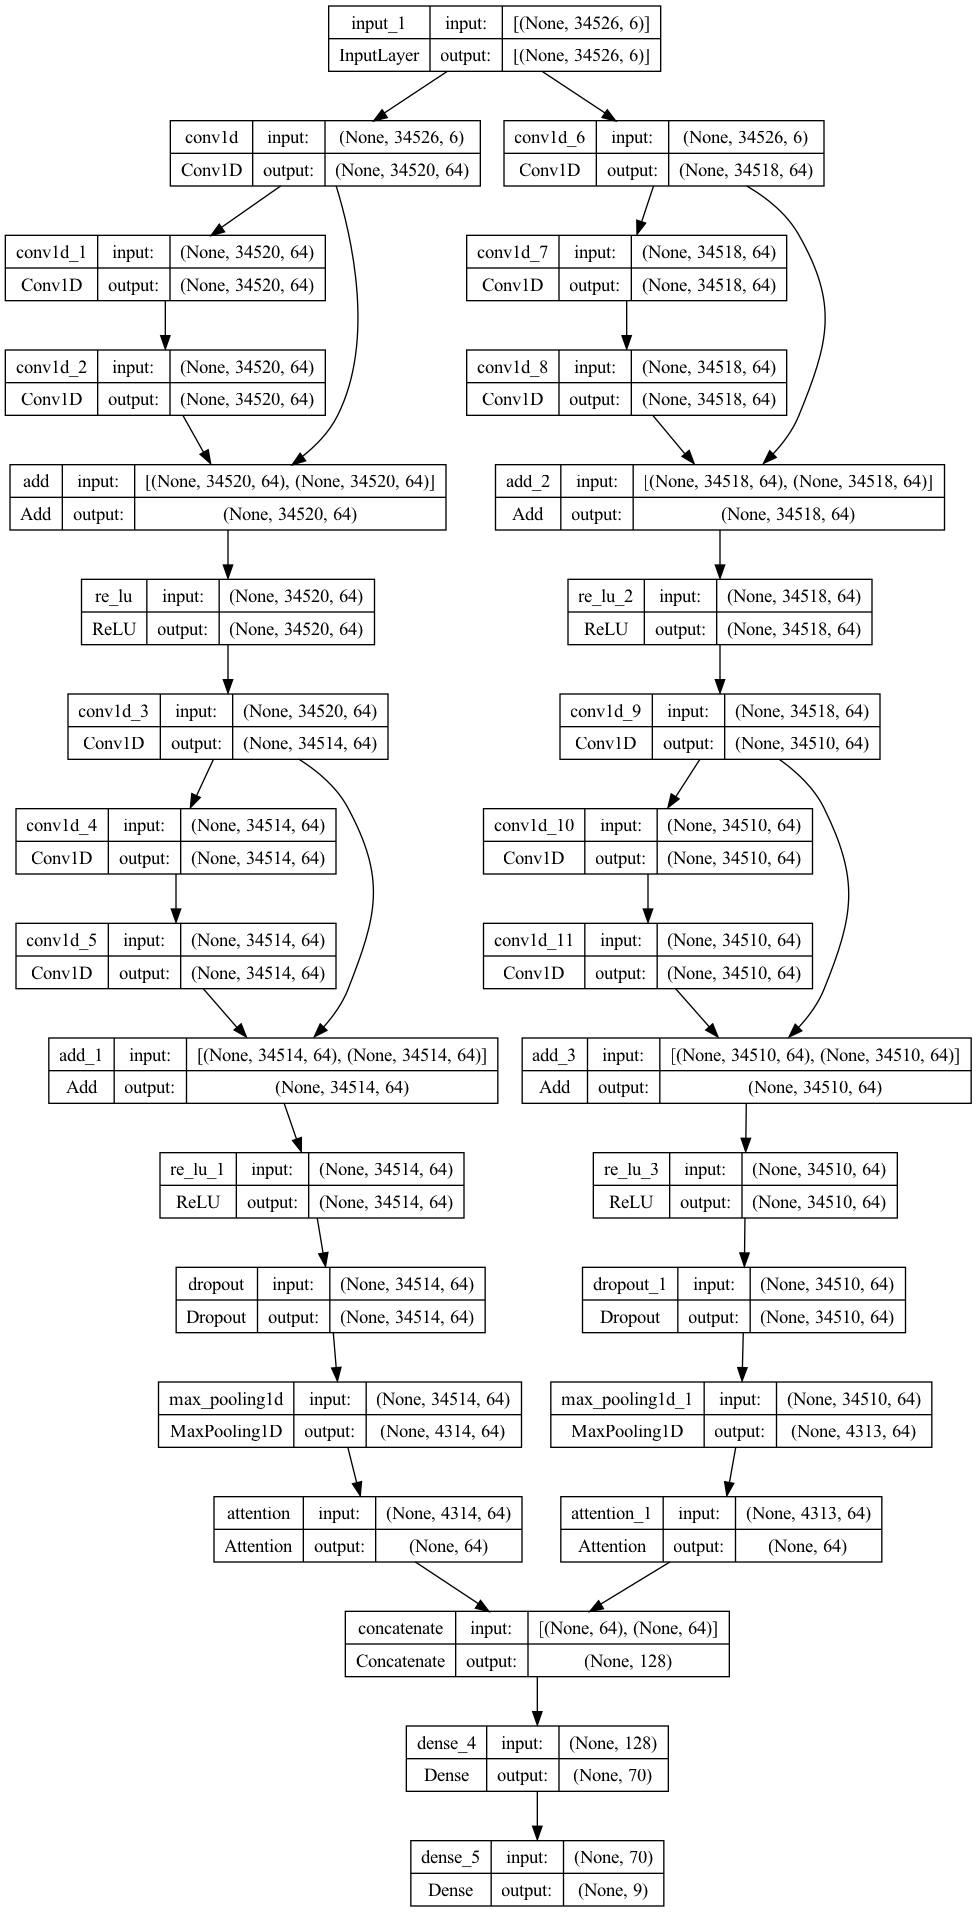

In [4]:
model = MultiBranch(input_size=(max_seq_len, 6),
                    param_branches=params_branches,
                    number_branches=2, 
                    param_consensus=params_consensus,
                    params_model= params_model,
                    metrics=[Pearson(return_dict=True)]
                    )

model.print_model()
# model.summary() #if information about number of params needed

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 34526, 6)]           0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 34520, 64)            2688      ['input_1[0][0]']             
                                                                                                  
 conv1d_6 (Conv1D)           (None, 34518, 64)            3456      ['input_1[0][0]']             
                                                                                                  
 conv1d_1 (Conv1D)           (None, 34520, 64)            28736     ['conv1d[0][0]']              
                                                                                              

In [6]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data, 
                                 params_train_dataLoader=params_dataLoader_train, 
                                 params_eval_dataLoader=params_dataLoader_valid, 
                                 params_train=params_train)

Epoch 1/20
311/311 [==============================] - 1949s 6s/step - loss: 6.4366 - ERM: 3.6851e-04 - KDEL: -0.0015 - LMA: 2.2932e-04 - MITO: 0.0012 - NES: 1.5604e-04 - NIK: 2.2631e-04 - NLS: -7.4852e-04 - NUCP: 2.3065e-04 - OMM: -2.7969e-04 - val_loss: 5.9707 - val_ERM: 0.0000e+00 - val_KDEL: 3.0316e-13 - val_LMA: 0.0000e+00 - val_MITO: 0.0000e+00 - val_NES: -3.5369e-13 - val_NIK: -3.0316e-13 - val_NLS: 0.0000e+00 - val_NUCP: 0.0000e+00 - val_OMM: 0.0000e+00
Epoch 2/20
311/311 [==============================] - 1997s 6s/step - loss: 5.7876 - ERM: 3.6165e-14 - KDEL: 3.6393e-14 - LMA: 1.1159e-13 - MITO: 1.8470e-14 - NES: 4.6823e-14 - NIK: 2.9037e-14 - NLS: 7.7431e-15 - NUCP: -2.5734e-15 - OMM: -3.8837e-14 - val_loss: 5.6139 - val_ERM: 0.0000e+00 - val_KDEL: 0.0000e+00 - val_LMA: 0.0000e+00 - val_MITO: 0.0000e+00 - val_NES: 0.0000e+00 - val_NIK: 0.0000e+00 - val_NLS: 1.0611e-12 - val_NUCP: 1.1369e-12 - val_OMM: 0.0000e+00
Epoch 3/20
311/311 [==============================] - 2006s 6s/st

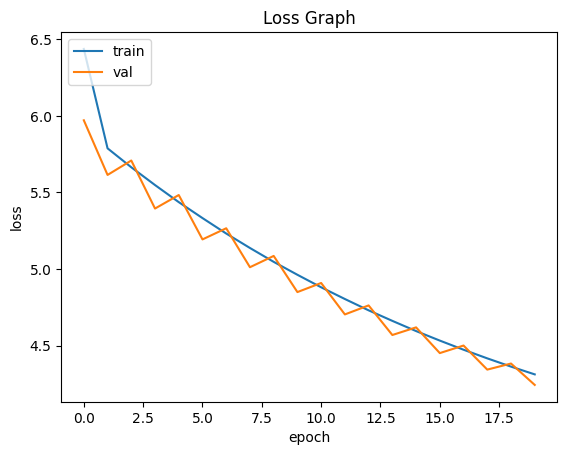

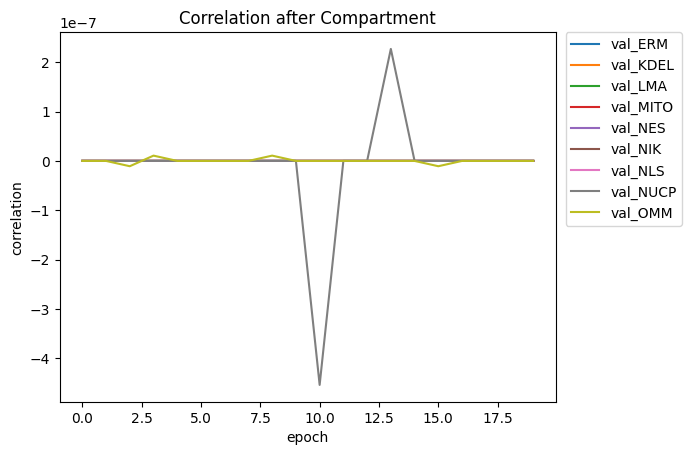

In [7]:
import matplotlib.pyplot as plt
from plotting import multiplot_pearson
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

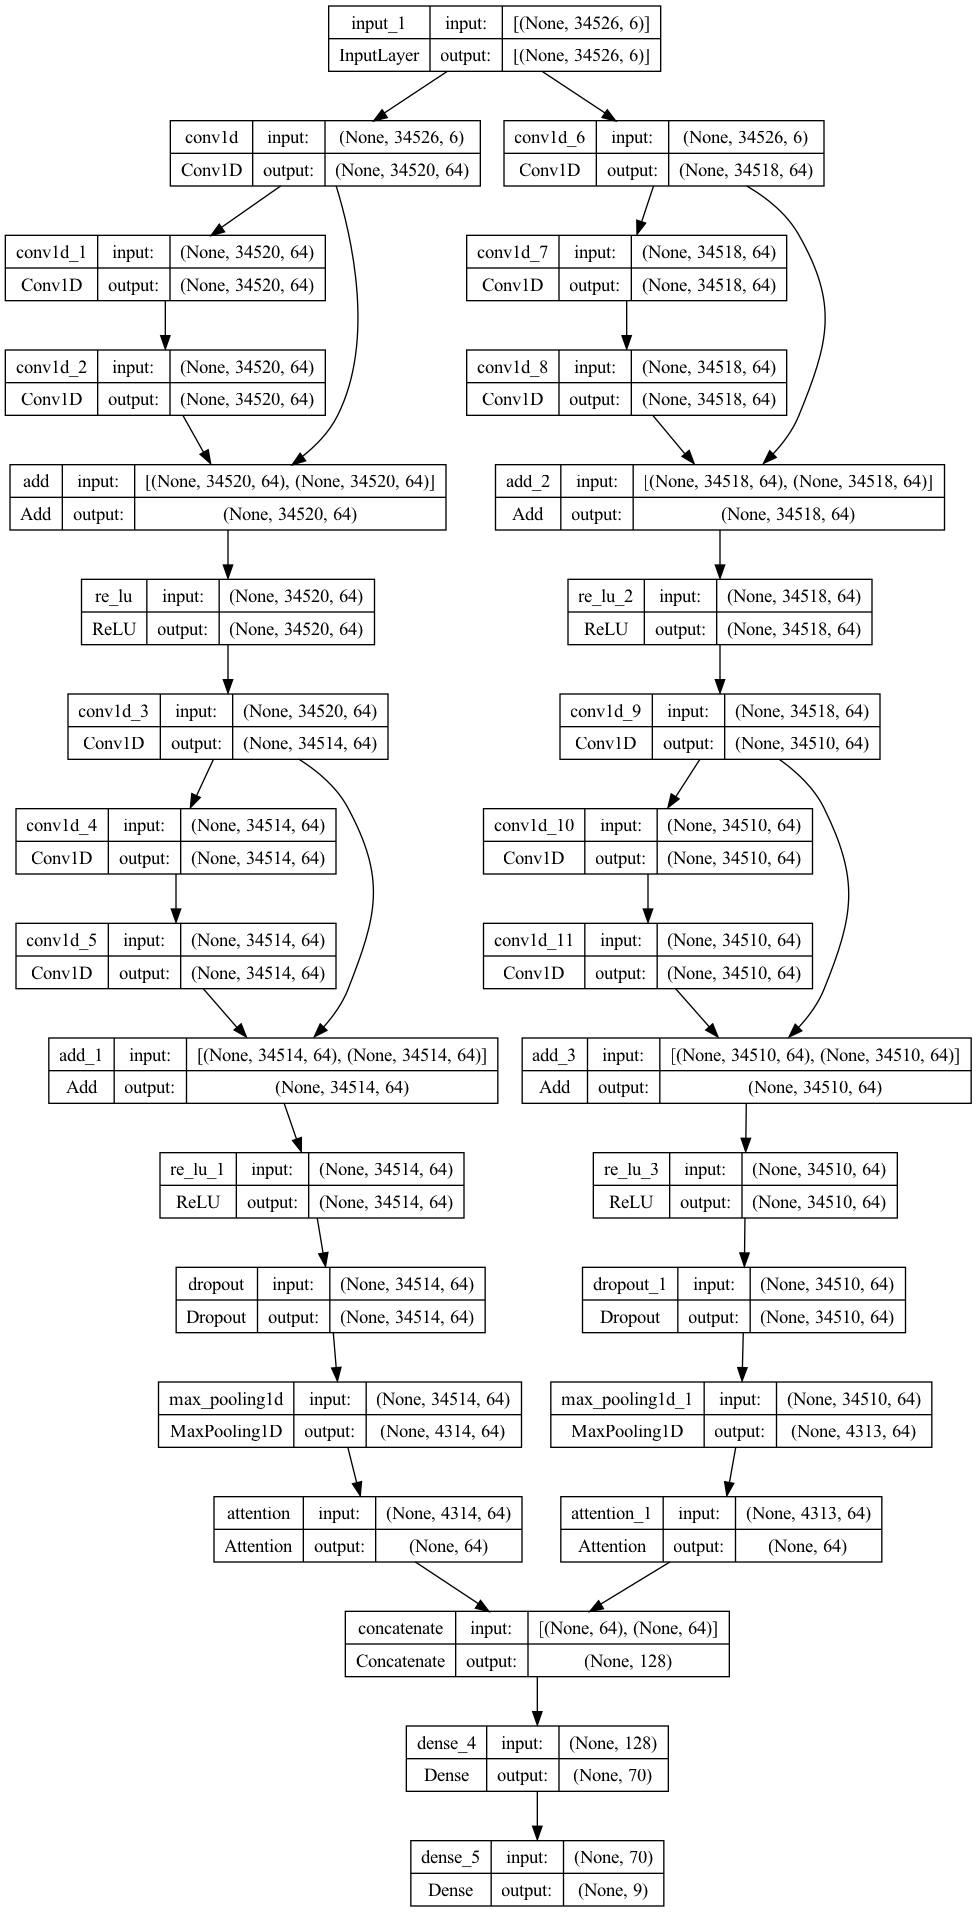

In [8]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)